In [27]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

In [2]:
df = pd.read_csv('data.csv', header=None)

10


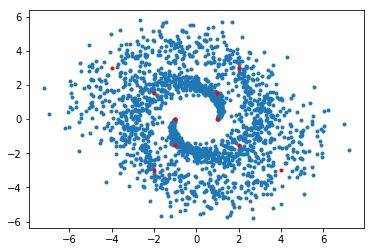

In [40]:
arr = df.values
plt.plot([x[0] for x in arr], [x[1] for x in arr], '.')

r = 0
phi = 0

pos_point = np.array([1,0])
pos_points = [pos_point]

neg_point = np.array([-1, 0])
neg_points = [neg_point]

for x in range(4):
    phi += math.pi/2
    r += 1.5
    
    pos_point = pos_point + np.array([r*math.cos(phi), r*math.sin(phi)])
    pos_points.append(pos_point)
    
    neg_point = neg_point - np.array([r*math.cos(phi), r*math.sin(phi)])
    neg_points.append(neg_point)

points = []
points += neg_points
points += pos_points
print(len(points))

plt.plot([x[0] for x in points], [x[1] for x in points], 'r.')

In [41]:
gmm = GaussianMixture(n_components=len(points), means_init=points)

In [42]:
gmm.fit(arr)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=array([[-1. ,  0. ],
       [-1. , -1.5],
       [ 2. , -1.5],
       [ 2. ,  3. ],
       [-4. ,  3. ],
       [ 1. ,  0. ],
       [ 1. ,  1.5],
       [-2. ,  1.5],
       [-2. , -3. ],
       [ 4. , -3. ]]),
        n_components=10, n_init=1, precisions_init=None, random_state=None,
        reg_covar=1e-06, tol=0.001, verbose=0, verbose_interval=10,
        warm_start=False, weights_init=None)

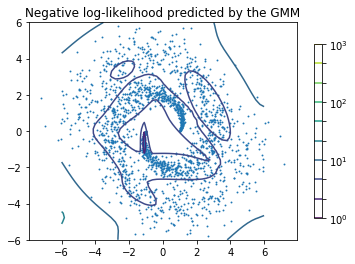

In [45]:
x = np.linspace(-6., 6.)
y = np.linspace(-6., 6.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -gmm.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(arr[:, 0], arr[:, 1], .8)

plt.title('Negative log-likelihood predicted by the GMM')
plt.axis('tight')
plt.show()